In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


In [20]:
data = pd.read_csv("/content/drive/MyDrive/ML project files/World Population Growth.csv")
print(data.head())

   Year     Population Yearly Growth %      Number  Density (Pop/km2)
0  1951  2,543,130,380           1.75%  43,808,223                 17
1  1952  2,590,270,899           1.85%  47,140,519                 17
2  1953  2,640,278,797           1.93%  50,007,898                 18
3  1954  2,691,979,339           1.96%  51,700,542                 18
4  1955  2,746,072,141           2.01%  54,092,802                 18


In [21]:
X = data['Year'].values.reshape(-1, 1)
y = data['Population'].values


In [22]:
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

# Clean the 'Population' data by removing commas and converting to numeric
y_cleaned = np.array([float(str(val).replace(',', '')) for val in y])

model = LinearRegression()
model.fit(X_poly, y_cleaned)

LinearRegression()

In [23]:
future_year = np.array([[2030]])
future_year_poly = poly.transform(future_year)

prediction = model.predict(future_year_poly)
print("Predicted Population in 2030:", int(prediction[0]))


Predicted Population in 2030: 8564262192


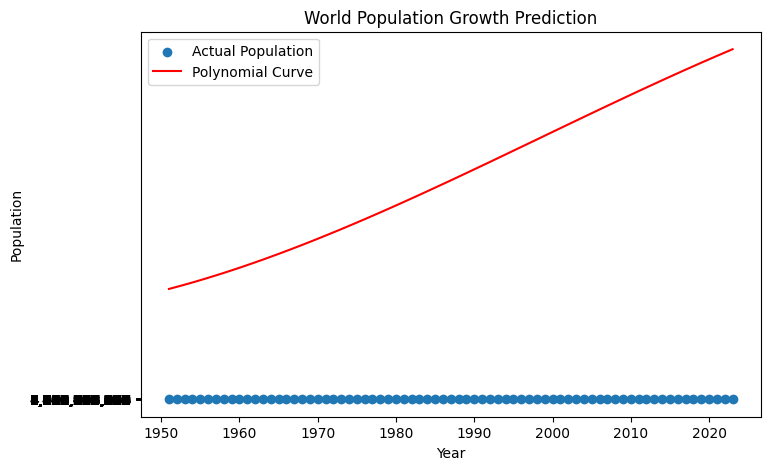

In [24]:
plt.figure(figsize=(8,5))
plt.scatter(X, y, label='Actual Population')
plt.plot(X, model.predict(X_poly), color='red', label='Polynomial Curve')
plt.xlabel("Year")
plt.ylabel("Population")
plt.title("World Population Growth Prediction")
plt.legend()
plt.show()
